In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


https://webrobots.io/kickstarter-datasets/

In [173]:
pd.options.display.max_columns = None

In [174]:
data = pd.read_csv('Kickstarter.csv')

In [175]:
data.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,0,"A humble little Astro traveling around brewing up fresh coffee and hot meals at National Parks, Rock Gyms, and Trail heads.","{""id"":311,""name"":""Food Trucks"",""analytics_name"":""Food Trucks"",""slug"":""food/food trucks"",""position"":8,""parent_id"":10,""parent_name"":""Food"",""color"":16725570,""urls"":{""web"":{""discover"":""http://www.kick...",0,US,the United States,1498065534,"{""id"":939819973,""name"":""Daniel Sanchez"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/017/204/442/4...",USD,$,True,USD,1500766709,False,NaN,1.000000,1000,1166044523,NaN,False,NaN,1498174709,"{""id"":2475687,""name"":""Portland"",""slug"":""portland-or"",""short_name"":""Portland, OR"",""displayable_name"":""Portland, OR"",""localized_name"":""Portland"",""country"":""US"",""state"":""OR"",""type"":""Town"",""is_root"":f...",CrimpCoffee: Good Coffee Good Times,NaN,"{""key"":""assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png"",""full"":""https://ksr-ugc.imgix.net/assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png?ixlib=rb-2.1.0&crop=fac...",0.00,"{""id"":3047341,""project_id"":3047341,""state"":""inactive"",""state_changed_at"":1498065534,""name"":null,""blurb"":null,""background_color"":null,""text_color"":null,""link_background_color"":null,""link_text_color...",crimpcoffee-good-coffee-good-times,https://www.kickstarter.com/discover/categories/food/food%20trucks,False,False,failed,1500766709,1.000000,"{""web"":{""project"":""https://www.kickstarter.com/projects/939819973/crimpcoffee-good-coffee-good-times?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/939819973/crimpc...",0.000000,international
1,454,"Spooky ghost miniatures for tabletop gaming, RPG, DnD. Great for undead themed campaigns.","{""id"":34,""name"":""Tabletop Games"",""analytics_name"":""Tabletop Games"",""slug"":""games/tabletop games"",""position"":6,""parent_id"":12,""parent_name"":""Games"",""color"":51627,""urls"":{""web"":{""discover"":""http://w...",17010,DK,Denmark,1603805375,"{""id"":1449949486,""name"":""Fleshcraft Studio"",""slug"":""fleshcraftstudio"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc....",DKK,kr,True,USD,1607716729,False,NaN,0.161007,7500,986370978,NaN,False,NaN,1605124729,"{""id"":557827,""name"":""Svendborg"",""slug"":""svendborg-dk"",""short_name"":""Svendborg, Denmark"",""displayable_name"":""Svendborg, Denmark"",""localized_name"":""Svendborg"",""country"":""DK"",""state"":""Syddanmark"",""ty...",Spawns of the Great Rot - Printable stl 3d miniatures,NaN,"{""key"":""assets/031/378/029/0463bccb1bb9ac99bc7f8f8d22d1ec42_original.png"",""full"":""https://ksr-ugc.imgix.net/assets/031/378/029/0463bccb1bb9ac99bc7f8f8d22d1ec42_original.png?ixlib=rb-2.1.0&crop=fac...",104176.17,"{""id"":4097429,""project_id"":4097429,""state"":""active"",""state_changed_at"":1607952554,""name"":""Spawns of the Great Rot - Printable stl 3d miniatures"",""blurb"":""Spooky ghost miniatures for tabletop gamin...",spawns-of-the-great-rot-printable-stl-3d-miniatures,https://www.kickstarter.com/discover/categories/games,True,False,successful,1607716729,0.158957,"{""web"":{""project"":""https://www.kickstarter.com/projects/fleshcraftstudio/spawns-of-the-great-rot-printable-stl-3d-miniatures?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/p...",16559.556457,internation

# Data Cleaning

#drop duplicated items

In [176]:
data['id'].duplicated().sum()

11

In [177]:
duplicates = data[data.duplicated(subset='id')]

In [178]:
data.drop_duplicates(inplace=True)

### Date conversion

In [179]:
from datetime import datetime

In [180]:
def unix(row):
    ts = datetime.utcfromtimestamp(int(row)).strftime('%Y-%m-%d')
    return ts

data['Launched_at'] = data['launched_at'].apply(unix)
data['Deadline'] = data['deadline'].apply(unix)
data['Created'] = data['created_at'].apply(unix)

In [181]:
data['Launched_at'] = pd.DatetimeIndex(data['Launched_at'])
data['Deadline'] = pd.DatetimeIndex(data['Deadline'])
data['Created'] = pd.DatetimeIndex(data['Created'])

In [182]:
data['Launched_at'].sort_values(ascending=False)

2429   2021-04-14
231    2021-04-14
1057   2021-04-14
2580   2021-04-14
3567   2021-04-13
          ...    
488    2010-02-23
1065   2010-01-13
3167   2010-01-05
1641   2009-10-20
1689   2009-05-12
Name: Launched_at, Length: 3670, dtype: datetime64[ns]

In [183]:
data['Deadline'].sort_values(ascending=False)

2580   2021-06-13
1057   2021-06-13
1677   2021-06-12
896    2021-06-11
3287   2021-06-11
          ...    
1957   2010-05-03
3167   2010-03-05
1065   2010-03-01
1641   2010-01-15
1689   2009-08-01
Name: Deadline, Length: 3670, dtype: datetime64[ns]

In [184]:
data['Created'].sort_values(ascending=False)

3287   2021-04-13
1677   2021-04-13
2429   2021-04-11
2576   2021-04-10
1166   2021-04-08
          ...    
488    2010-02-12
1065   2010-01-07
3167   2009-12-31
1641   2009-10-15
1689   2009-05-12
Name: Created, Length: 3670, dtype: datetime64[ns]

In [185]:
data['Launch_Period'] = data['Deadline']-data['Launched_at']
data['Created_to_Launch'] = data['Launched_at']-data['Created']

In [186]:
data['Created_to_Launch']

0        1 days
1       15 days
2       12 days
3        8 days
4       73 days
         ...   
3665   399 days
3666    13 days
3667    24 days
3668     5 days
3669    26 days
Name: Created_to_Launch, Length: 3670, dtype: timedelta64[ns]

In [187]:
data['Launch_Period'] 

0      30 days
1      30 days
2      20 days
3      53 days
4      29 days
         ...  
3665   14 days
3666   22 days
3667   15 days
3668   15 days
3669   30 days
Name: Launch_Period, Length: 3670, dtype: timedelta64[ns]

In [188]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'Launched_at', 'Deadline', 'Created', 'Launch_Period',
       'Created_to_Launch'],
      dtype='object')

In [189]:
data = data.drop(['created_at'], axis = 1)
data = data.drop(['deadline'], axis = 1)
data = data.drop(['launched_at'], axis = 1)

In [190]:
data['Launch_Year'] = data['Launched_at'].apply(lambda x:str(x)[:4])
data['Launch_Month'] = data['Launched_at'].apply(lambda x:str(x)[5:7])
data['Launch_Day'] = data['Launched_at'].apply(lambda x:str(x)[8:10])


In [191]:
data['Launch_Year']


0       2017
1       2020
2       2017
3       2020
4       2020
        ... 
3665    2020
3666    2021
3667    2020
3668    2018
3669    2021
Name: Launch_Year, Length: 3670, dtype: object

In [192]:
data['Launch_Month']


0       06
1       11
2       04
3       11
4       10
        ..
3665    06
3666    03
3667    08
3668    03
3669    03
Name: Launch_Month, Length: 3670, dtype: object

In [193]:
data['Launch_Day']

0       22
1       11
2       27
3       12
4       01
        ..
3665    15
3666    15
3667    27
3668    14
3669    30
Name: Launch_Day, Length: 3670, dtype: object

In [194]:
data.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,creator,currency,currency_symbol,currency_trailing_code,current_currency,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,Launched_at,Deadline,Created,Launch_Period,Created_to_Launch,Launch_Year,Launch_Month,Launch_Day
0,0,"A humble little Astro traveling around brewing up fresh coffee and hot meals at National Parks, Rock Gyms, and Trail heads.","{""id"":311,""name"":""Food Trucks"",""analytics_name"":""Food Trucks"",""slug"":""food/food trucks"",""position"":8,""parent_id"":10,""parent_name"":""Food"",""color"":16725570,""urls"":{""web"":{""discover"":""http://www.kick...",0,US,the United States,"{""id"":939819973,""name"":""Daniel Sanchez"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc.imgix.net/assets/017/204/442/4...",USD,$,True,USD,False,NaN,1.000000,1000,1166044523,NaN,False,NaN,"{""id"":2475687,""name"":""Portland"",""slug"":""portland-or"",""short_name"":""Portland, OR"",""displayable_name"":""Portland, OR"",""localized_name"":""Portland"",""country"":""US"",""state"":""OR"",""type"":""Town"",""is_root"":f...",CrimpCoffee: Good Coffee Good Times,NaN,"{""key"":""assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png"",""full"":""https://ksr-ugc.imgix.net/assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png?ixlib=rb-2.1.0&crop=fac...",0.00,"{""id"":3047341,""project_id"":3047341,""state"":""inactive"",""state_changed_at"":1498065534,""name"":null,""blurb"":null,""background_color"":null,""text_color"":null,""link_background_color"":null,""link_text_color...",crimpcoffee-good-coffee-good-times,https://www.kickstarter.com/discover/categories/food/food%20trucks,False,False,failed,1500766709,1.000000,"{""web"":{""project"":""https://www.kickstarter.com/projects/939819973/crimpcoffee-good-coffee-good-times?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/939819973/crimpc...",0.000000,international,2017-06-22,2017-07-22,2017-06-21,30 days,1 days,2017,06,22
1,454,"Spooky ghost miniatures for tabletop gaming, RPG, DnD. Great for undead themed campaigns.","{""id"":34,""name"":""Tabletop Games"",""analytics_name"":""Tabletop Games"",""slug"":""games/tabletop games"",""position"":6,""parent_id"":12,""parent_name"":""Games"",""color"":51627,""urls"":{""web"":{""discover"":""http://w...",17010,DK,Denmark,"{""id"":1449949486,""name"":""Fleshcraft Studio"",""slug"":""fleshcraftstudio"",""is_registered"":null,""is_email_verified"":null,""chosen_currency"":null,""is_superbacker"":null,""avatar"":{""thumb"":""https://ksr-ugc....",DKK,kr,True,USD,False,NaN,0.161007,7500,986370978,NaN,False,NaN,"{""id"":557827,""name"":""Svendborg"",""slug"":""svendborg-dk"",""short_name"":""Svendborg, Denmark"",""displayable_name"":""Svendborg, Denmark"",""localized_name"":""Svendborg"",""country"":""DK"",""state"":""Syddanmark"",""ty...",Spawns of the Great Rot - Printable stl 3d miniatures,NaN,"{""key"":""assets/031/378/029/0463bccb1bb9ac99bc7f8f8d22d1ec42_original.png"",""full"":""https://ksr-ugc.imgix.net/assets/031/378/029/0463bccb1bb9ac99bc7f8f8d22d1ec42_original.png?ixlib=rb-2.1.0&crop=fac...",104176.17,"{""id"":4097429,""project_id"":4097429,""state"":""active"",""state_changed_at"":1607952554,""name"":""Spawns of the Great Rot - Printable stl 3d miniatures"",""blurb"":""Spooky ghost miniatures for tabletop gamin...",spawns-of-the-great-rot-printable-stl-3d-miniatures,https://www.kickstarter.com/discover/categories/games,True,False,successful,1607716729,0.158957,"{""web"":{""project"":""https://www.kickstarter.com/projects/fleshcraftstudio/spawns-of-the-great-rot-printable-stl-3d-miniatures?ref=discovery_category_newest"",""rewards"":""

### name,blurb conversion

In [195]:
data['blurb_words_count'] = data['blurb'].str.split().str.len()
data['name_words_count'] = data['name'].str.split().str.len()

In [196]:
data['blurb_words_count']

0       21
1       13
2       23
3       24
4       19
        ..
3665     6
3666     8
3667    16
3668    17
3669    22
Name: blurb_words_count, Length: 3670, dtype: int64

In [197]:
data['name_words_count']

0        5
1       10
2        2
3        9
4        6
        ..
3665     5
3666     4
3667     9
3668     4
3669     8
Name: name_words_count, Length: 3670, dtype: int64

In [198]:
data=data.drop(['blurb','name'],axis = 1)

### Goal change to usd

In [199]:
# Calculate new column 'usd_goal' as goal * static_usd_rate
data['usd_goal'] = round(data['goal'] * data['static_usd_rate'],2)

In [200]:
data=data.drop(['goal','static_usd_rate'],axis = 1)

### category

In [201]:
data['source_url'][3]

'https://www.kickstarter.com/discover/categories/games'

In [202]:
data['category'][2]

'{"id":272,"name":"Mobile Games","analytics_name":"Mobile Games","slug":"games/mobile games","position":3,"parent_id":12,"parent_name":"Games","color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/mobile%20games"}}}'

In [203]:
data['Main_Categories'] = data['source_url'].apply(lambda df:df.split('/')[5])
data['Main_Categories'].value_counts()

film%20&%20video    926
music               897
food                471
publishing          372
fashion             341
journalism          244
games               190
technology          131
design               56
dance                21
crafts               21
Name: Main_Categories, dtype: int64

In [204]:
data=data.drop(['category'],axis = 1)

### Check and drop unessary columns

In [205]:
data['profile'][0]

'{"id":3047341,"project_id":3047341,"state":"inactive","state_changed_at":1498065534,"name":null,"blurb":null,"background_color":null,"text_color":null,"link_background_color":null,"link_text_color":null,"link_text":null,"link_url":null,"show_feature_image":false,"background_image_opacity":0.8,"should_show_feature_image_section":true,"feature_image_attributes":{"image_urls":{"default":"https://ksr-ugc.imgix.net/assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png?ixlib=rb-2.1.0&crop=faces&w=1552&h=873&fit=crop&v=1498082603&auto=format&frame=1&q=92&s=2a22afe531dab3c02926c6af572c563a","baseball_card":"https://ksr-ugc.imgix.net/assets/017/204/299/11b86dcad20a73f1882c9ba5649a6f4f_original.png?ixlib=rb-2.1.0&crop=faces&w=560&h=315&fit=crop&v=1498082603&auto=format&frame=1&q=92&s=0a46e80ce182bddafde5f475b6b9c0fa"}}}'

In [206]:
data['slug']

0                          crimpcoffee-good-coffee-good-times
1         spawns-of-the-great-rot-printable-stl-3d-miniatures
2                                          dreamcatcher-games
3                    felbars-shoppe-of-curiosities-and-occult
4              wander-flavorful-and-functional-pantry-staples
                                ...                          
3665                      blood-and-thunder-automatic-watches
3666                           creature-comfort-throw-blanket
3667    ifidget-bracelet-fidget-at-your-fingertips-discreetly
3668                     dance-aegis-premieres-fission-fusion
3669                                                  snactiv
Name: slug, Length: 3670, dtype: object

In [207]:
data['disable_communication'].value_counts()

False    3670
Name: disable_communication, dtype: int64

In [208]:
data['is_starrable'].value_counts()

False    3582
True       88
Name: is_starrable, dtype: int64

In [209]:
data['permissions'].value_counts()

[]    2
Name: permissions, dtype: int64

In [210]:
data['current_currency'].value_counts()

USD    3666
EUR       2
CAD       2
Name: current_currency, dtype: int64

In [211]:
data['usd_type'].value_counts()

international    3664
domestic            2
Name: usd_type, dtype: int64

In [212]:
data['friends'].value_counts()

[]    2
Name: friends, dtype: int64

In [213]:
data['is_backing'].value_counts()

False    2
Name: is_backing, dtype: int64

In [214]:
data['is_starred'].unique()

array([nan, False], dtype=object)

In [215]:
data['staff_pick'].value_counts()

False    3225
True      445
Name: staff_pick, dtype: int64

In [216]:
data = data.drop(['profile','is_starrable','is_starred','is_backing','converted_pledged_amount','country_displayable_name','friends','disable_communication','currency_symbol','currency_trailing_code','creator','usd_type','state_changed_at','currency','current_currency','location','photo','permissions','pledged','slug','fx_rate','id','source_url','pledged'],axis = 1)

In [217]:
data.head()

,backers_count,country,spotlight,staff_pick,state,urls,usd_pledged,Launched_at,Deadline,Created,Launch_Period,Created_to_Launch,Launch_Year,Launch_Month,Launch_Day,blurb_words_count,name_words_count,usd_goal,Main_Categories
0,0,US,False,False,failed,"{""web"":{""project"":""https://www.kickstarter.com/projects/939819973/crimpcoffee-good-coffee-good-times?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/939819973/crimpc...",0.000000,2017-06-22,2017-07-22,2017-06-21,30 days,1 days,2017,06,22,21,5,1000.00,food
1,454,DK,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/fleshcraftstudio/spawns-of-the-great-rot-printable-stl-3d-miniatures?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/p...",16559.556457,2020-11-11,2020-12-11,2020-10-27,30 days,15 days,2020,11,11,13,10,1192.18,games
2,1,GB,False,False,failed,"{""web"":{""project"":""https://www.kickstarter.com/projects/dreamcatchercomics/dreamcatcher-games?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/dreamcatchercomics/drea...",64.185017,2017-04-27,2017-05-17,2017-04-15,20 days,12 days,2017,04,27,23,2,641.85,games
3,92,US,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/thecommonlands/felbars-shoppe-of-curiosities-and-occult?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/theco...",6223.000000,2020-11-12,2021-01-04,2020-11-04,53 days,8 days,2020,11,12,24,9,5000.00,games
4,128,US,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/wanderfoods/wander-flavorful-and-functional-pantry-staples?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/wa...",10448.000000,2020-10-01,2020-10-30,2020-07-20,29 days,73 days,2020,10,01,19,6,10000.00,food


# Null Value Check

In [218]:
data.isnull().sum()

backers_count        0
country              0
spotlight            0
staff_pick           0
state                0
urls                 0
usd_pledged          0
Launched_at          0
Deadline             0
Created              0
Launch_Period        0
Created_to_Launch    0
Launch_Year          0
Launch_Month         0
Launch_Day           0
blurb_words_count    0
name_words_count     0
usd_goal             0
Main_Categories      0
dtype: int64

# Deal with Outliers

In [219]:
#sns.heatmap(data)

In [220]:
#sns.pairplot(data)

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usd_pledged', ylabel='Density'>

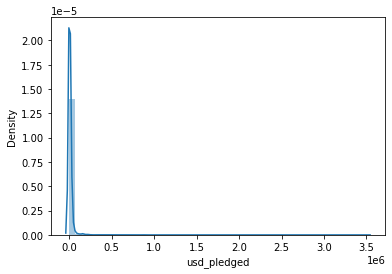

In [221]:
sns.distplot(data['usd_pledged'])

In [222]:
data.describe()

,backers_count,usd_pledged,Launch_Period,Created_to_Launch,blurb_words_count,name_words_count,usd_goal
count,3670.000000,3.670000e+03,3670,3670,3670.000000,3670.000000,3.670000e+03
mean,121.920981,1.074435e+04,33 days 16:44:51.662125340,47 days 03:05:59.019073569,18.052316,5.689646,3.883545e+04
std,608.343958,7.081422e+04,12 days 09:23:31.919665863,144 days 06:29:01.210732386,5.640883,2.699116,8.513298e+05
min,0.000000,0.000000e+00,2 days 00:00:00,0 days 00:00:00,1.000000,1.000000,1.000000e+00
25%,4.000000,1.000000e+02,30 days 00:00:00,3 days 00:00:00,15.000000,4.000000,1.764420e+03
50%,27.000000,1.805500e+03,30 days 00:00:00,11 days 00:00:00,19.000000,5.000000,5.000000e+03
75%,89.000000,7.255250e+03,36 days 00:00:00,35 days 00:00:00,22.000000,8.000000,1.397281e+04
max,24912.000000,3.502960e+06,91 days 00:00:00,2958 days 00:00:00,32.000000,16.000000,5.000000e+07


<AxesSubplot:xlabel='usd_pledged', ylabel='backers_count'>

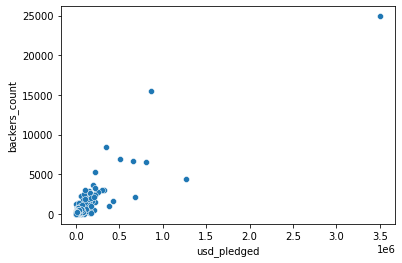

In [223]:
sns.scatterplot(data=data,x='usd_pledged',y='backers_count')

In [224]:
pd.options.display.max_colwidth = 200

In [225]:
q = data['usd_pledged'].quantile(0.999) 
data[data['usd_pledged']>q]['urls']


234     {"web":{"project":"https://www.kickstarter.com/projects/pixels-dice/pixels-the-electronic-dice?ref=discovery_category_newest","rewards":"https://www.kickstarter.com/projects/pixels-dice/pixels-the...
791     {"web":{"project":"https://www.kickstarter.com/projects/instafloss/instafloss-say-bye-to-painful-time-consuming-flossing?ref=discovery_category_newest","rewards":"https://www.kickstarter.com/proje...
942     {"web":{"project":"https://www.kickstarter.com/projects/timbuktu/kickstarter-gold-good-night-stories-for-rebel-girl?ref=discovery_category_newest","rewards":"https://www.kickstarter.com/projects/t...
2761    {"web":{"project":"https://www.kickstarter.com/projects/acemarks/handcrafted-dress-shoes-reinvented-for-the-modern?ref=discovery_category_newest","rewards":"https://www.kickstarter.com/projects/ac...
Name: urls, dtype: object

In [226]:
data = data[data['usd_pledged']<q]

# EDA

###### 1.Top Earned project


In [227]:
data['Main_Categories'].value_counts()

film%20&%20video    926
music               897
food                471
publishing          371
fashion             340
journalism          244
games               189
technology          130
design               56
dance                21
crafts               21
Name: Main_Categories, dtype: int64

<AxesSubplot:ylabel='Main_Categories'>

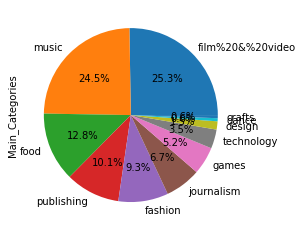

In [228]:
# Top Categories
data['Main_Categories'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='state'>

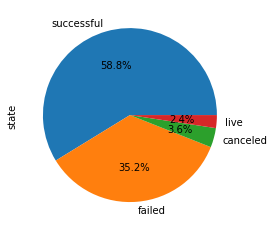

In [229]:
data['state'].value_counts().plot.pie(autopct='%1.1f%%')

In [230]:
#only look into finished projects
data = data[data['state']!='live']
#data = data[(data['state']!='live')&(data['state']!='canceled')]
data['state'].unique()

array(['failed', 'successful', 'canceled'], dtype=object)

In [231]:
data['state'] = data['state'].map({'canceled':'failed','failed':'failed','successful':'successful'})
#data['state'] = data['state'].map({'failed':'failed','successful':'successful'})

In [232]:
data['state'].unique()

array(['failed', 'successful'], dtype=object)

In [233]:
data['Launch_Year'].unique()


array(['2017', '2020', '2014', '2016', '2021', '2019', '2018', '2015',
       '2013', '2012', '2011', '2010', '2009'], dtype=object)

In [234]:
data['Launch_Period']=data['Launch_Period'].dt.days
data['Created_to_Launch']=data['Created_to_Launch'].dt.days

In [235]:
data['Launch_Year'] = data['Launch_Year'].astype(str).astype(int)
data['Launch_Month'] = data['Launch_Month'].astype(str).astype(int)
data['Launch_Day'] = data['Launch_Day'].astype(str).astype(int)
data['Launch_Period'] = data['Launch_Period'].astype(str).astype(int)
data['Created_to_Launch'] = data['Created_to_Launch'].astype(str).astype(int)


Text(0.5, 1.0, 'Number of projects over the years')

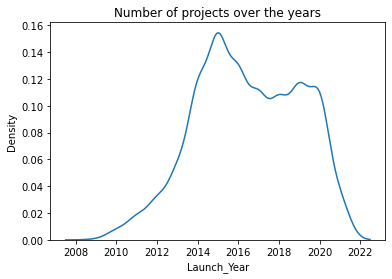

In [236]:
sns.kdeplot(data = data, x = 'Launch_Year',palette='viridis')
plt.title('Number of projects over the years')

Text(0.5, 1.0, 'Number of projects over the years')

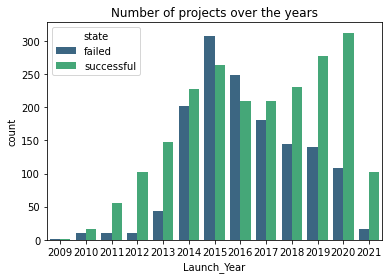

In [237]:
sns.countplot(data = data, x = data['Launch_Year'],hue = 'state',palette='viridis')
plt.title('Number of projects over the years')

Text(0.5, 1.0, 'Months with highest successful cases')

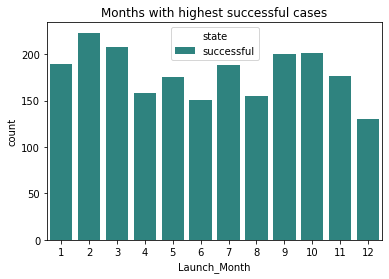

In [238]:
#months with highest successful numbers
succesful = data[data['state']=='successful']
sns.countplot(data = succesful, x = 'Launch_Month',hue = 'state',palette='viridis')
plt.title('Months with highest successful cases')

Text(0.5, 1.0, 'Projects per country')

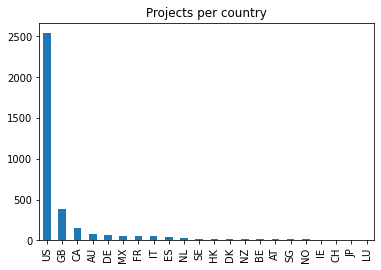

In [239]:
#most participated countries
x = data.country.value_counts().plot(kind='bar')
plt.title('Projects per country')

c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


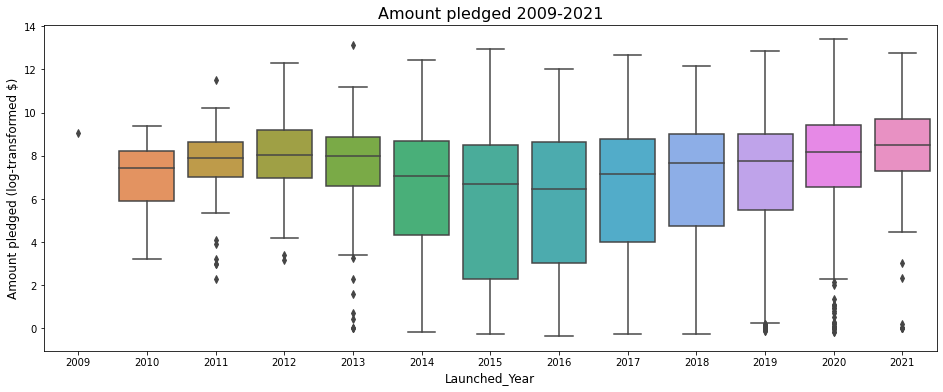

In [240]:
# Plotting the distribution of pledged amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(data.Launched_at.dt.year, np.log(data.usd_pledged))
plt.xlabel('Launched_Year', fontsize=12)
plt.ylabel('Amount pledged (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged 2009-2021', fontsize=16)
plt.show()

In [241]:
#highest pledged from 2009
data.sort_values('usd_pledged', ascending = False).head(10)[['urls','Main_Categories']]

,urls,Main_Categories
169,"{""web"":{""project"":""https://www.kickstarter.com/projects/hitpointpress/heckna-cosmic-carnival-horror-campaign-setting-for-5e-dnd?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.co...",games
850,"{""web"":{""project"":""https://www.kickstarter.com/projects/1302528630/masters-of-anatomy?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/1302528630/masters-of-anatomy/r...",publishing
2443,"{""web"":{""project"":""https://www.kickstarter.com/projects/774031583/implosion-zero-day?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/774031583/implosion-zero-day/rew...",film%20&%20video
1096,"{""web"":{""project"":""https://www.kickstarter.com/projects/skytrek/skytrek-the-best-smart-luggage-in-the-world?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/skytrek/s...",technology
84,"{""web"":{""project"":""https://www.kickstarter.com/projects/tomvasel/dice-tower-2021?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/tomvasel/dice-tower-2021/rewards""}}",games
72,"{""web"":{""project"":""https://www.kickstarter.com/projects/99831120/arcana-heart-3-love-max-six-stars-2d-fighting-game?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/9...",games
175,"{""web"":{""project"":""https://www.kickstarter.com/projects/radgostforest/forest-of-radgost?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/radgostforest/forest-of-radgo...",games
1547,"{""web"":{""project"":""https://www.kickstarter.com/projects/vincentregan/enemy-of-man-feature-film?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/vincentregan/enemy-of-...",film%20&%20video
306,"{""web"":{""project"":""https://www.kickstarter.com/projects/hon-br1/heroes-of-normandie-big-red-one-edition?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/hon-br1/heroe...",games
65,"{""web"":{""project"":""https://www.kickstarter.com/projects/nordgames/dangerous-destinations?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/nordgames/dangerous-destinat...",games


In [242]:
# highest pledged project in 3 years
threeyears_data = data[data['Launch_Year']>2018]
#highest pledged from 2009
threeyears_data.sort_values('usd_pledged', ascending = False).head(10)[['urls']]

,urls
169,"{""web"":{""project"":""https://www.kickstarter.com/projects/hitpointpress/heckna-cosmic-carnival-horror-campaign-setting-for-5e-dnd?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.co..."
1096,"{""web"":{""project"":""https://www.kickstarter.com/projects/skytrek/skytrek-the-best-smart-luggage-in-the-world?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/skytrek/s..."
84,"{""web"":{""project"":""https://www.kickstarter.com/projects/tomvasel/dice-tower-2021?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/tomvasel/dice-tower-2021/rewards""}}"
175,"{""web"":{""project"":""https://www.kickstarter.com/projects/radgostforest/forest-of-radgost?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/radgostforest/forest-of-radgo..."
306,"{""web"":{""project"":""https://www.kickstarter.com/projects/hon-br1/heroes-of-normandie-big-red-one-edition?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/hon-br1/heroe..."
65,"{""web"":{""project"":""https://www.kickstarter.com/projects/nordgames/dangerous-destinations?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/nordgames/dangerous-destinat..."
3560,"{""web"":{""project"":""https://www.kickstarter.com/projects/1740872294/isospine-trigger-point-therapy-to-stretch-out-your-back?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/pro..."
790,"{""web"":{""project"":""https://www.kickstarter.com/projects/2034560442/air-omni-a-6-in-1-charging-machine-for-apple-family?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/project..."
1062,"{""web"":{""project"":""https://www.kickstarter.com/projects/1749662654/godview-55g-lightweight-300-5k-super-waveguide-mr-glasses?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/p..."
3666,"{""web"":{""project"":""https://www.kickstarter.com/projects/159974695/creature-comfort-throw-blanket?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/159974695/creature-c..."


Text(0.5, 1.0, 'Success and Failure of each categories')

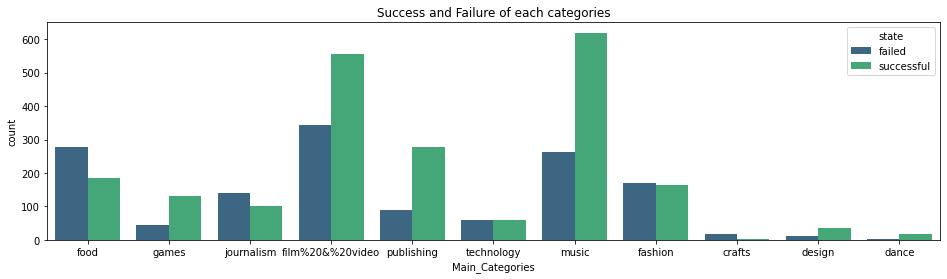

In [243]:
fig, ax = plt.subplots(figsize= (16, 4))
sns.countplot(ax=ax,data = data, x = data['Main_Categories'],hue = 'state',palette='viridis')
plt.title('Success and Failure of each categories')

Text(0.5, 1.0, 'Successful cases of each categories')

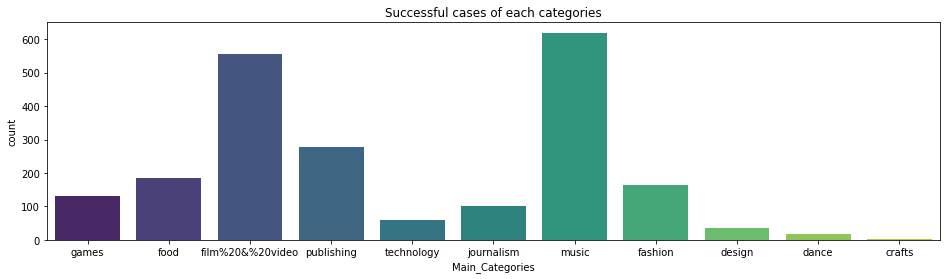

In [244]:
# most successful categories
fig, ax = plt.subplots(figsize= (16, 4))
sns.countplot(ax=ax, data = succesful, x = 'Main_Categories',palette='viridis')
plt.title('Successful cases of each categories')

In [245]:
data.head()

,backers_count,country,spotlight,staff_pick,state,urls,usd_pledged,Launched_at,Deadline,Created,Launch_Period,Created_to_Launch,Launch_Year,Launch_Month,Launch_Day,blurb_words_count,name_words_count,usd_goal,Main_Categories
0,0,US,False,False,failed,"{""web"":{""project"":""https://www.kickstarter.com/projects/939819973/crimpcoffee-good-coffee-good-times?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/939819973/crimpc...",0.000000,2017-06-22,2017-07-22,2017-06-21,30,1,2017,6,22,21,5,1000.00,food
1,454,DK,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/fleshcraftstudio/spawns-of-the-great-rot-printable-stl-3d-miniatures?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/p...",16559.556457,2020-11-11,2020-12-11,2020-10-27,30,15,2020,11,11,13,10,1192.18,games
2,1,GB,False,False,failed,"{""web"":{""project"":""https://www.kickstarter.com/projects/dreamcatchercomics/dreamcatcher-games?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/dreamcatchercomics/drea...",64.185017,2017-04-27,2017-05-17,2017-04-15,20,12,2017,4,27,23,2,641.85,games
3,92,US,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/thecommonlands/felbars-shoppe-of-curiosities-and-occult?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/theco...",6223.000000,2020-11-12,2021-01-04,2020-11-04,53,8,2020,11,12,24,9,5000.00,games
4,128,US,True,False,successful,"{""web"":{""project"":""https://www.kickstarter.com/projects/wanderfoods/wander-flavorful-and-functional-pantry-staples?ref=discovery_category_newest"",""rewards"":""https://www.kickstarter.com/projects/wa...",10448.000000,2020-10-01,2020-10-30,2020-07-20,29,73,2020,10,1,19,6,10000.00,food


In [246]:
data_cleaned=data.drop(['urls','Launched_at','Deadline','Created'],axis=1)


In [247]:
data_cleaned_linear = data_cleaned.copy()

# Data Transformation

array([[<AxesSubplot:title={'center':'backers_count'}>,
        <AxesSubplot:title={'center':'usd_pledged'}>,
        <AxesSubplot:title={'center':'Launch_Period'}>],
       [<AxesSubplot:title={'center':'Created_to_Launch'}>,
        <AxesSubplot:title={'center':'Launch_Year'}>,
        <AxesSubplot:title={'center':'Launch_Month'}>],
       [<AxesSubplot:title={'center':'Launch_Day'}>,
        <AxesSubplot:title={'center':'blurb_words_count'}>,
        <AxesSubplot:title={'center':'name_words_count'}>],
       [<AxesSubplot:title={'center':'usd_goal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

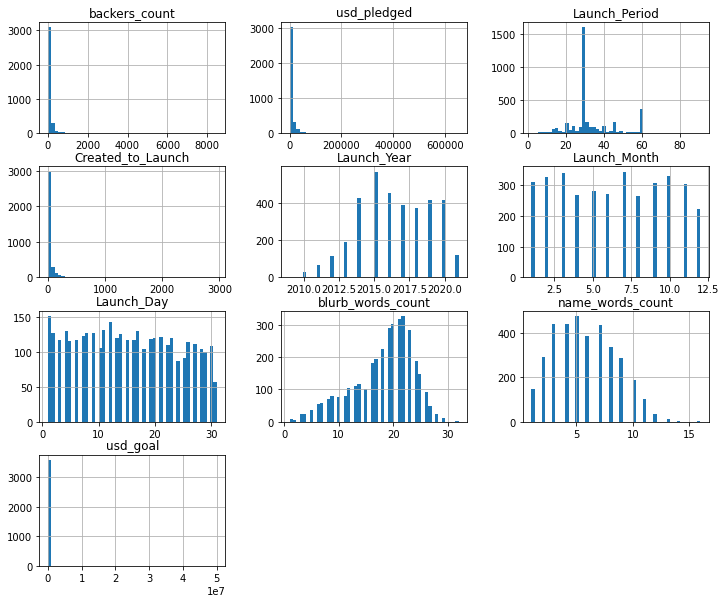

In [248]:
# check skewness and distribution
data_cleaned[data_cleaned.describe().columns].hist(figsize=(12,10),bins = 50)

<AxesSubplot:>

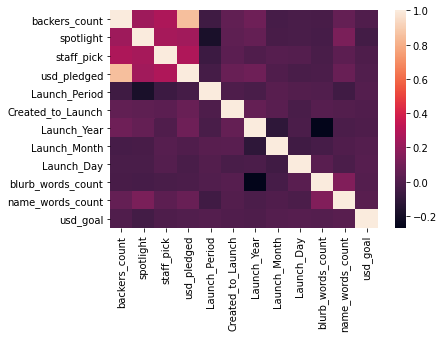

In [249]:
sns.heatmap(data_cleaned.corr())

### Create dummy variables

In [250]:
data_cleaned.head()

,backers_count,country,spotlight,staff_pick,state,usd_pledged,Launch_Period,Created_to_Launch,Launch_Year,Launch_Month,Launch_Day,blurb_words_count,name_words_count,usd_goal,Main_Categories
0,0,US,False,False,failed,0.000000,30,1,2017,6,22,21,5,1000.00,food
1,454,DK,True,False,successful,16559.556457,30,15,2020,11,11,13,10,1192.18,games
2,1,GB,False,False,failed,64.185017,20,12,2017,4,27,23,2,641.85,games
3,92,US,True,False,successful,6223.000000,53,8,2020,11,12,24,9,5000.00,games
4,128,US,True,False,successful,10448.000000,29,73,2020,10,1,19,6,10000.00,food


In [251]:
data_cleaned['spotlight'] = data_cleaned['spotlight'].map({True: 1, False:0})
data_cleaned['staff_pick'] = data_cleaned['staff_pick'].map({True: 1, False:0})
data_cleaned['state'] = data_cleaned['state'].map({'successful': 1, 'failed':0})

In [252]:
data_cleaned['spotlight']

0       0
1       1
2       0
3       1
4       1
       ..
3663    1
3665    1
3666    1
3667    1
3668    1
Name: spotlight, Length: 3578, dtype: int64

In [253]:
month= pd.get_dummies(data_cleaned['Launch_Month'],drop_first=True)
#day= pd.get_dummies(data_cleaned['Launch_Day'],drop_first=False)
categories = pd.get_dummies(data_cleaned['Main_Categories'],drop_first=True)
#country = pd.get_dummies(data_cleaned['country'],drop_first=False)


In [254]:
data_cleaned=pd.concat([data_cleaned,month,categories],axis=1)

In [255]:
data_cleaned

,backers_count,country,spotlight,staff_pick,state,usd_pledged,Launch_Period,Created_to_Launch,Launch_Year,Launch_Month,Launch_Day,blurb_words_count,name_words_count,usd_goal,Main_Categories,2,3,4,5,6,7,8,9,10,11,12,dance,design,fashion,film%20&%20video,food,games,journalism,music,publishing,technology
0,0,US,0,0,0,0.000000,30,1,2017,6,22,21,5,1000.00,food,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,454,DK,1,0,1,16559.556457,30,15,2020,11,11,13,10,1192.18,games,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,GB,0,0,0,64.185017,20,12,2017,4,27,23,2,641.85,games,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,92,US,1,0,1,6223.000000,53,8,2020,11,12,24,9,5000.00,games,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,128,US,1,0,1,10448.000000,29,73,2020,10,1,19,6,10000.00,food,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,181,US,1,1,1,12972.000000,26,11,2020,11,8,15,4,7500.00,design,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3665,11,CA,1,0,1,4123.386083,14,399,2020,6,15,6,5,2207.66,design,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3666,2188,US,1,1,1,204313.000000,22,13,2021,3,15,8,4,5000.00,fashion,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3667,85,GB,1,0,1,3703.839916,15,24,2020,8,27,16,9,2626.84,design,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [256]:
data_predict_pledging_amount = data_cleaned.copy()
data_predict_success_failed = data_cleaned.copy()

In [257]:
# Replacing 0s with 0.01 and log-transforming (logistic regression and random forest)
log_columns = ['Created_to_Launch', 'name_words_count', 'usd_goal','backers_count']
for col in log_columns:
    data_predict_success_failed[col] = data_predict_success_failed[col].astype('float64').replace(0.0, 0.01)
    data_predict_success_failed[col] = np.log(data_predict_success_failed[col])

In [258]:
# this is for logistic regression and random forest
data_predict_success_failed = data_predict_success_failed.drop(['country','backers_count','Launch_Year','Launch_Day','Launch_Month','Main_Categories','usd_pledged','spotlight'],axis=1)

In [259]:
# Replacing 0s with 0.01 and log-transforming (linear regression and random forest regression)
data_predict_pledging_amount['usd_pledged'] = data_predict_pledging_amount['usd_pledged'].astype('float64').replace(0.0, 0.01)
data_predict_pledging_amount['usd_pledged'] = np.log(data_predict_pledging_amount['usd_pledged'])

In [260]:
# this is for linear regression 
data_predict_pledging_amount = data_predict_pledging_amount.drop(['state','country','backers_count','Launch_Year','Launch_Day','Launch_Month','Main_Categories','spotlight'],axis=1)


In [261]:
data_predict_pledging_amount.replace([-np.inf], np.nan, inplace=True)
data_predict_pledging_amount =data_predict_pledging_amount.dropna(subset=['usd_pledged'], how="all")



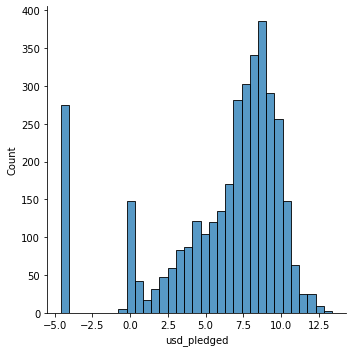

In [262]:
sns.displot(data = data_predict_pledging_amount, x = 'usd_pledged')

In [263]:
data_predict_pledging_amount[data_predict_pledging_amount['usd_pledged']<-2.5]


,staff_pick,usd_pledged,Launch_Period,Created_to_Launch,blurb_words_count,name_words_count,usd_goal,2,3,4,5,6,7,8,9,10,11,12,dance,design,fashion,film%20&%20video,food,games,journalism,music,publishing,technology
0,0,-4.60517,30,1,21,5,1000.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24,0,-4.60517,28,6,19,2,13000.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45,0,-4.60517,14,249,26,4,129780.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50,0,-4.60517,30,87,21,8,3000.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
70,0,-4.60517,60,72,18,4,35000.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0,-4.60517,30,1,18,2,35000.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3569,0,-4.60517,60,13,7,6,25000.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3636,0,-4.60517,30,6,14,6,7443.61,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3642,0,-4.60517,21,2,23,4,22462.64,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [264]:
data_predict_pledging_amount = data_predict_pledging_amount[data_predict_pledging_amount['usd_pledged']>-2.5]

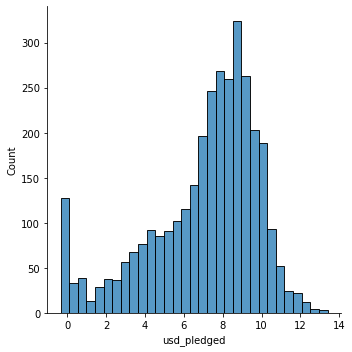

In [265]:
sns.displot(data = data_predict_pledging_amount, x = 'usd_pledged')

# Predict success and fail

# Data split and Standardization for distance based models for logistic regression

In [266]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_predict_success_failed.drop('state',axis=1),data_predict_success_failed['state'],test_size=0.3,random_state=101)

In [267]:
X_train

,staff_pick,Launch_Period,Created_to_Launch,blurb_words_count,name_words_count,usd_goal,2,3,4,5,6,7,8,9,10,11,12,dance,design,fashion,film%20&%20video,food,games,journalism,music,publishing,technology
781,1,19,2.639057,22,2.302585,6.214608,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2199,0,30,0.000000,20,0.693147,10.203592,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1572,0,60,2.397895,22,2.079442,16.118096,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3658,0,24,3.583519,12,1.945910,8.030331,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
179,0,37,2.995732,16,1.386294,7.608548,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0,30,2.197225,23,1.386294,6.907755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1646,0,31,4.499810,23,1.945910,10.596635,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1406,1,34,3.367296,24,2.397895,9.210340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1594,0,45,1.098612,15,1.098612,9.210340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
X_train_scaled_features=StandardScaler().fit_transform(X_train.values)
X_test_scaled_features=StandardScaler().fit_transform(X_test.values)

In [270]:
#dataframe
X_train_scaled_features_df=pd.DataFrame(X_train_scaled_features, index=X_train.index,columns=X_train.columns)
X_test_scaled_features_df=pd.DataFrame(X_test_scaled_features, index=X_test.index,columns=X_test.columns)

# Logistic regression

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
logmodel=LogisticRegression()
logmodel.fit(X_train_scaled_features,y_train)

LogisticRegression()

### test

In [273]:
predictions=logmodel.predict(X_test_scaled_features)

In [274]:
predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [275]:
data={'Predicted':predictions,'Actual':y_test}
df=pd.DataFrame(data=data_predict_success_failed)
df

,staff_pick,state,Launch_Period,Created_to_Launch,blurb_words_count,name_words_count,usd_goal,2,3,4,5,6,7,8,9,10,11,12,dance,design,fashion,film%20&%20video,food,games,journalism,music,publishing,technology
0,0,0,30,0.000000,21,1.609438,6.907755,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,30,2.708050,13,2.302585,7.083539,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,20,2.484907,23,0.693147,6.464355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,53,2.079442,24,2.197225,8.517193,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,29,4.290459,19,1.791759,9.210340,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,1,1,26,2.397895,15,1.386294,8.922658,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3665,0,1,14,5.988961,6,1.609438,7.699688,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3666,1,1,22,2.564949,8,1.386294,8.517193,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3667,0,1,15,3.178054,16,2.197225,7.873537,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [276]:
pd.DataFrame({'variable':[c for c in X_train_scaled_features_df.columns],'cofficient':[round(x,2)for x in logmodel.coef_[0]]}).sort_values('cofficient',ascending=False).style.bar(color=['grey','lightblue'],align='zero')

,variable,cofficient
24,music,0.950000
0,staff_pick,0.940000
20,film%20&%20video,0.840000
25,publishing,0.670000
2,Created_to_Launch,0.620000
22,games,0.400000
17,dance,0.280000
26,technology,0.280000
19,fashion,0.270000
21,food,0.250000


In [277]:
#for each x test data, what is the probability of predicting 1,0
pred_proba_df = pd.DataFrame(logmodel.predict_proba(X_test_scaled_features))

In [278]:
pred_proba_df.head()

,0,1
0,0.157813,0.842187
1,0.042610,0.957390
2,0.224822,0.775178
3,0.316508,0.683492
4,0.261764,0.738236


### Evaluation

In [279]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[239 189]
 [111 535]]


In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61       428
           1       0.74      0.83      0.78       646

    accuracy                           0.72      1074
   macro avg       0.71      0.69      0.70      1074
weighted avg       0.72      0.72      0.71      1074



In [281]:
from sklearn.metrics import accuracy_score

In [282]:
log_test_acc=accuracy_score(y_test,predictions)
log_train_acc=accuracy_score(y_train,logmodel.predict(X_train_scaled_features))

In [283]:
log_test_acc

0.7206703910614525

In [284]:
log_train_acc

0.7360223642172524

In [285]:
print('Accuracy of logistic_test:',round(log_test_acc*100,2),'%')
print('Accuracy of logistic_train:',round(log_train_acc*100,2),'%')

Accuracy of logistic_test: 72.07 %
Accuracy of logistic_train: 73.6 %


# Decision tree


In [286]:
from sklearn.tree import DecisionTreeClassifier

In [287]:
# can change the max_depth to optimize
dtree=DecisionTreeClassifier(max_depth=4)


In [288]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [289]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [290]:
def f1_scores_by_depth(depth):
    dtree=DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train,y_train)
    return f1_score(y_true=y_train,y_pred=dtree.predict(X_train)),f1_score(y_true=y_test,y_pred=dtree.predict(X_test))

Text(0, 0.5, 'depth')

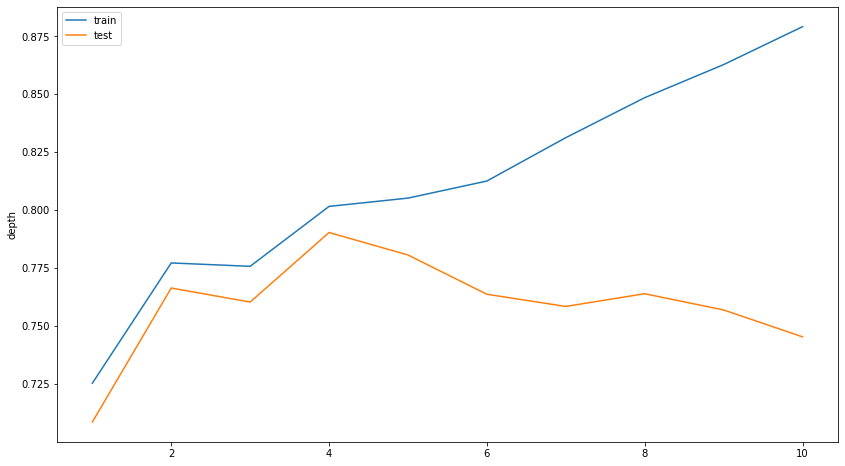

In [291]:
# smaller the gap, higher f1 score is better
pd.DataFrame([f1_scores_by_depth(depth) for depth in range(1,11)], 
             columns=['train', 'test'], 
             index=range(1,11)) \
  .plot(figsize=(14,8))
plt.ylabel('f1_score')
plt.ylabel('depth')

In [292]:
predictions=dtree.predict(X_test)

In [293]:
from sklearn.metrics import classification_report,confusion_matrix

In [294]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      0.40      0.52       428
           1       0.70      0.91      0.79       646

    accuracy                           0.71      1074
   macro avg       0.72      0.66      0.66      1074
weighted avg       0.72      0.71      0.68      1074



In [295]:
from sklearn.tree import plot_tree

0.7085661080074488
0.7256389776357828


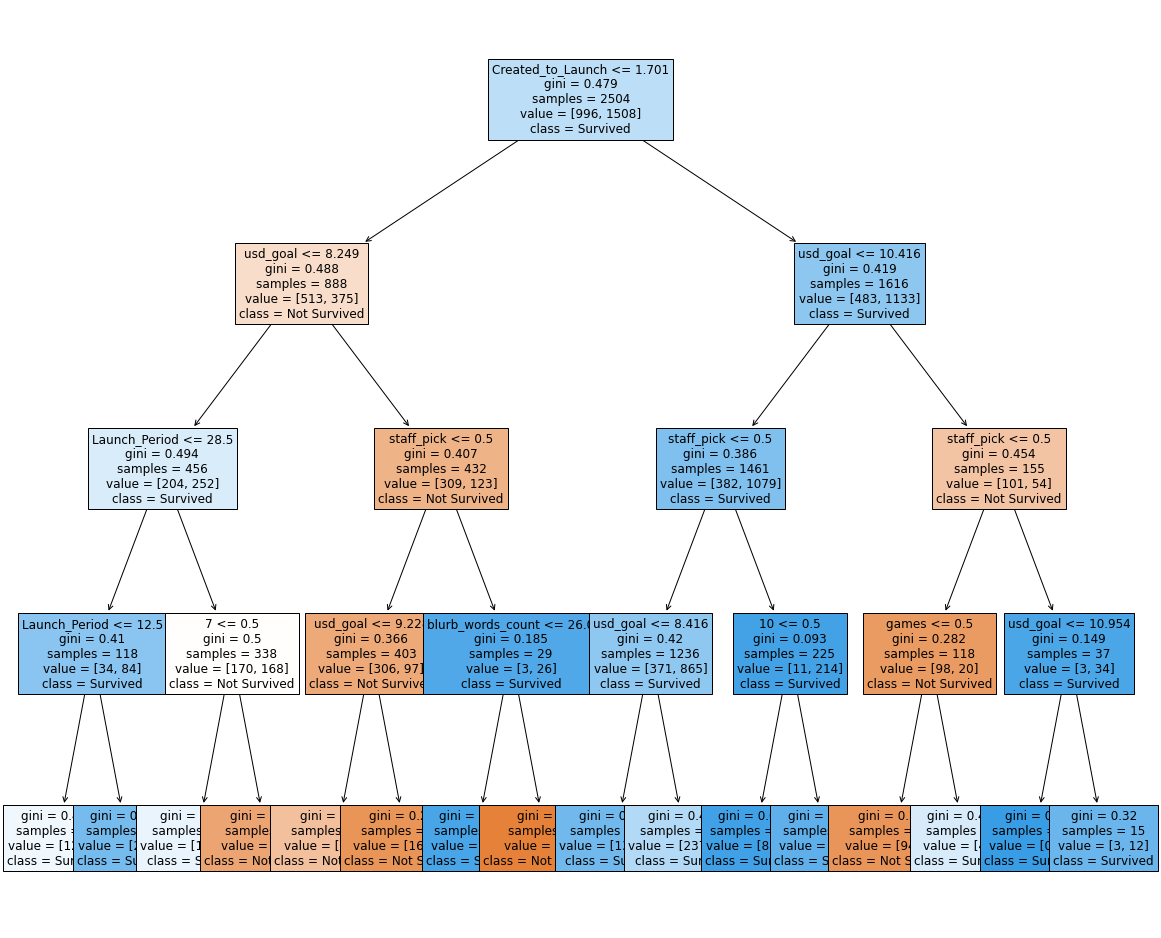

In [296]:
fig=plt.figure(figsize=(20,17))
a=plot_tree(dtree,feature_names=X_train.columns,fontsize=12,filled=True,
            class_names=['Not Survived','Survived'])

print(accuracy_score(y_true=y_test,y_pred=dtree.predict(X_test)))
print(accuracy_score(y_true=y_train,y_pred=dtree.predict(X_train)))


# Random Forest

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=6)

In [299]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [300]:
def f1_scores_by_depth_and_estimators(depth, n_estimators):
    rfc = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators)
    rfc.fit(X_train, y_train)
    return f1_score(y_true=y_test, y_pred=rfc.predict(X_test))

<AxesSubplot:>

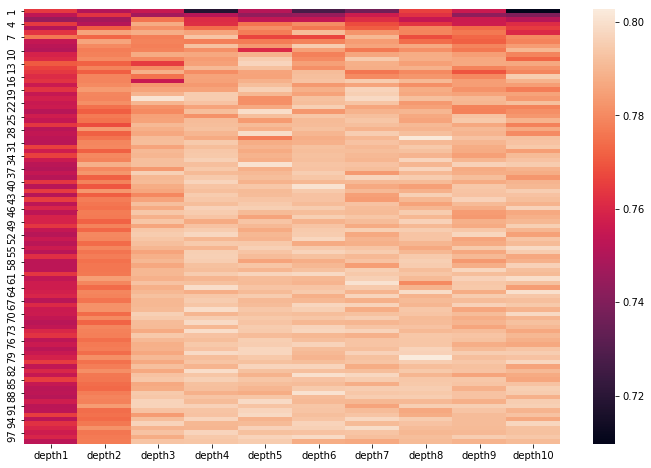

In [301]:
#based on f1 score
#prefer the lighter color(higher f1 score)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

d_range = range(1,11)
n_range = range(1,100)

sns.heatmap(
pd.DataFrame([[f1_scores_by_depth_and_estimators(d, n) for d in d_range] for n in n_range], 
             columns=['depth'+str(i) for i in d_range], 
             index=n_range)
)

In [302]:
prediction_rf=rfc.predict(X_test)

In [303]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       428
           1       0.72      0.89      0.79       646

    accuracy                           0.72      1074
   macro avg       0.73      0.68      0.69      1074
weighted avg       0.73      0.72      0.71      1074



In [304]:
#or based on accuracy
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

params_grid = {"max_features":[4,5,6,7,8,9,10],
                "min_samples_split":[2,3,10]}
                
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs = -1, cv=5, scoring='accuracy')


grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
cvrf_clf = grid_search.best_estimator_
print(accuracy_score(y_test, cvrf_clf.predict(X_test)))
print(confusion_matrix(y_test, cvrf_clf.predict(X_test)))

{'max_features': 6, 'min_samples_split': 10}
0.729050279329609
[[242 186]
 [105 541]]


## XG Boost

In [305]:
from xgboost import XGBClassifier

In [306]:
XGB_model=XGBClassifier()
XGB_model.fit(X_train,y_train)

[14:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\grace\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [307]:
y_pred = XGB_model.predict(X_test)
predictions_xg = [round(value) for value in y_pred]

In [308]:
# evaluate predictions
accuracy = accuracy_score(y_test,predictions_xg)

print('Acurracy of XGB:',accuracy*100.0,'%')

Acurracy of XGB: 70.48417132216015 %


In [309]:
print(classification_report(y_test,predictions_xg))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       428
           1       0.74      0.79      0.76       646

    accuracy                           0.70      1074
   macro avg       0.69      0.68      0.69      1074
weighted avg       0.70      0.70      0.70      1074



In [310]:
xgb_test_acc=accuracy_score(y_true=y_test, y_pred= XGB_model.predict(X_test))
xgb_train_acc=accuracy_score(y_true=y_train, y_pred= XGB_model.predict(X_train))
print("Accuracy of XGB_test: %.2f%%" % (xgb_test_acc * 100.0))
print("Accuracy of XGB_train: %.2f%%" % (xgb_train_acc * 100.0))

Accuracy of XGB_test: 70.48%
Accuracy of XGB_train: 97.12%


# Predict pledging amount

## split data and stadardisation

In [311]:
X = data_predict_pledging_amount.drop('usd_pledged',axis=1)
y = data_predict_pledging_amount['usd_pledged']

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=101)

In [314]:
from  sklearn.preprocessing import StandardScaler
X_train_scaled_features=StandardScaler().fit_transform(X_train.values)
X_test_scaled_features=StandardScaler().fit_transform(X_test.values)


In [315]:
X_test_scaled_features

array([[-0.3920039 , -0.27302412,  0.00609626, ...,  1.63829633,
        -0.3497289 , -0.18266935],
       [-0.3920039 , -2.14134545, -0.32953656, ..., -0.61039018,
        -0.3497289 , -0.18266935],
       [-0.3920039 , -0.27302412, -0.25853731, ..., -0.61039018,
        -0.3497289 , -0.18266935],
       ...,
       [-0.3920039 , -0.27302412,  3.07842744, ..., -0.61039018,
        -0.3497289 , -0.18266935],
       [-0.3920039 , -0.27302412,  0.03191417, ...,  1.63829633,
        -0.3497289 , -0.18266935],
       [-0.3920039 , -0.27302412, -0.32953656, ..., -0.61039018,
        -0.3497289 , -0.18266935]])

In [316]:
#array to df
X_train_scaled_features_df = pd.DataFrame(X_train_scaled_features,index=X_train.index,columns=X_train.columns)
X_test_scaled_features_df = pd.DataFrame(X_test_scaled_features,index=X_test.index,columns=X_test.columns)

In [317]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled_features,y_train)

LinearRegression()

In [318]:
print(lm.intercept_)

7.059734718946585


In [319]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
staff_pick,0.911381
Launch_Period,-0.300725
Created_to_Launch,0.199479
blurb_words_count,-0.124459
name_words_count,0.333922
usd_goal,-0.069800
2,0.059971
3,0.063423
4,0.047149
5,0.062010


In [320]:
predictions = lm.predict(X_test_scaled_features_df)

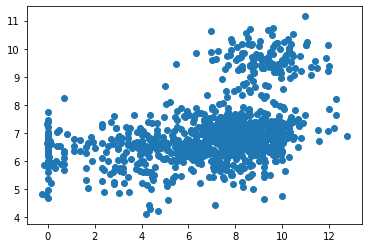

In [321]:
plt.scatter(y_test,predictions)

In [322]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [323]:
r2=r2_score(y_test,predictions)

In [324]:
r2

0.16987443936403546

In [325]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.9559581417694984
MSE: 6.41776104042643
RMSE: 2.5333300299065713


# Decision Tree Regressor

In [326]:
from sklearn.tree import DecisionTreeRegressor

In [327]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [328]:
#fit the best max.depth

myList = list(range(2,100))
scores=[]
for i in myList:
    dt_reg=DecisionTreeRegressor(max_depth=i)
    dt_reg.fit(X_train,y_train)
    scores.append(dt_reg.score(X_test,y_test))
    
print(myList[scores.index(max(scores))])

5


In [329]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_4 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)
regr_5.fit(X, y)

DecisionTreeRegressor(max_depth=10)

In [330]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

In [331]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_1)))
print('R Squared:',r2_score(y_test,y_1))

Mean Absolute Error: 1.9394317590605445
Mean Squared Error: 6.492492893931405
Root Mean Squared Error: 2.548037066828386
R Squared: 0.16020801186737377


In [332]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_5)))
print('R Squared:',r2_score(y_test,y_5))

NameError: name 'y_5' is not defined